In [97]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
df=pd.read_csv('/content/preprocessed_matches_by_teams.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10594 entries, 0 to 10593
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          10594 non-null  int64  
 1   match_id                            10594 non-null  object 
 2   color                               10594 non-null  object 
 3   team_id                             10594 non-null  object 
 4   team_slug                           10594 non-null  object 
 5   team_name                           10594 non-null  object 
 6   team_region                         10594 non-null  object 
 7   core_shots                          8708 non-null   float64
 8   core_goals                          8708 non-null   float64
 9   core_saves                          8708 non-null   float64
 10  core_assists                        8708 non-null   float64
 11  core_score                          8708 

**Ranking Points**

In [7]:
df['team_region'].unique()

array(['Oceania', 'North America', 'Asia-Pacific South',
       'Middle East & North Africa', 'Europe', 'South America',
       'Asia-Pacific North', 'Sub-Saharan Africa'], dtype=object)

In [8]:
# Group the data by team
grouped = df.groupby(['team_name'])

# Calculate the total matches played and won for each team
matches_played = grouped.count()['winner'].astype(bool).sum()
matches_won = grouped.sum()['winner'].astype(bool).sum()

# Create a new dataframe to store the results
# results = pd.DataFrame({'team_name': matches_played.index,
#                         'matches_played': matches_played.values,
#                         'matches_won': matches_won.values})

# The final dataframe will contain the team name, number of matches played, and number of matches won
matches_played


647

              team_name  matches_played  matches_won
0                  +966               7            3
1             00 NATION              69           32
2            01 ESPORTS              19           10
3            1620 KINGS              54           28
4           1NE ESPORTS              18           13
..                  ...             ...          ...
551     YOU'RE THROWING              45           18
552               ZBURA               4            1
553  ZINGER BOX BANDITS               4            1
554               ZNTRA              16            9
555        ZOOM N' BOOM               5            3

[556 rows x 3 columns]


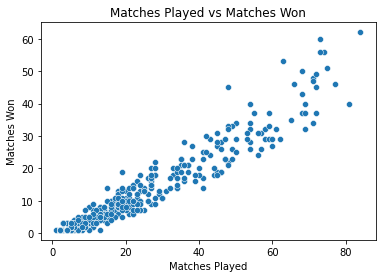

In [9]:
team_counts = df.groupby(['team_name'])['match_id'].nunique().reset_index(name='matches_played')
team_wins = df[df['winner']==True].groupby(['team_name'])['match_id'].nunique().reset_index(name='matches_won')

# Merge the two dataframes on team_name
team_results = pd.merge(team_counts, team_wins, on='team_name')
print(team_results)
# Plot the data
sns.scatterplot(x='matches_played', y='matches_won', data=team_results)
plt.xlabel('Matches Played')
plt.ylabel('Matches Won')
plt.title('Matches Played vs Matches Won')
plt.show()

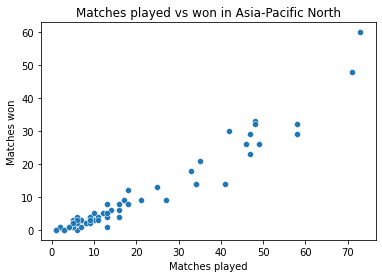

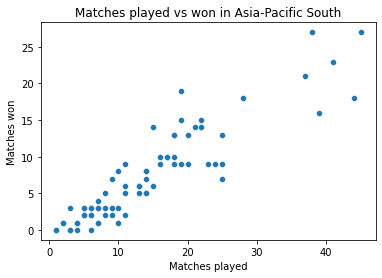

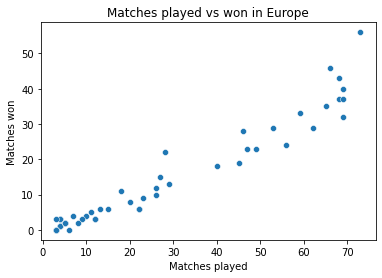

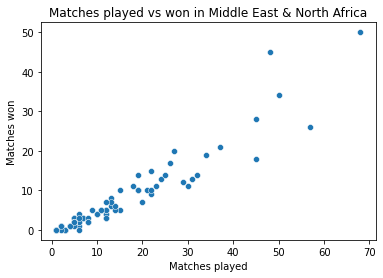

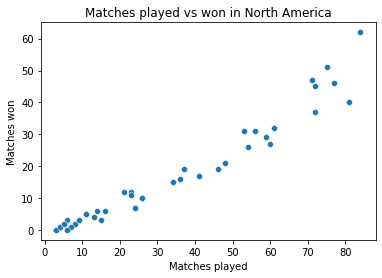

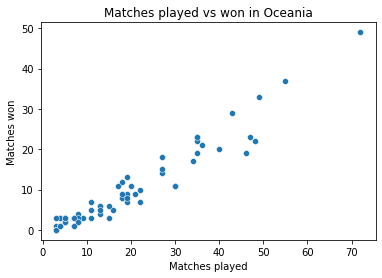

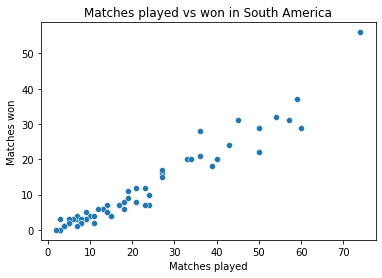

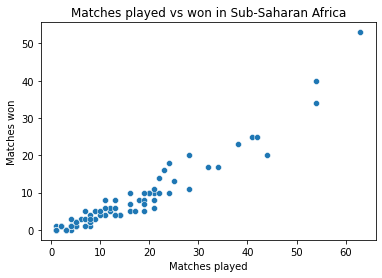

In [10]:
# Group data by region and team
grouped = df.groupby(['team_region', 'team_name'])

# Count number of matches played and matches won for each team in each region
played = grouped['match_id'].count().reset_index(name='played')
won = grouped.apply(lambda x: x[x['winner'] == True]['match_id'].count()).reset_index(name='won')

# Merge two dataframes on team_region and team_name
result = played.merge(won, on=['team_region', 'team_name'])

# Plot graph for each region
regions = result['team_region'].unique()
for region in regions:
    region_data = result[result['team_region'] == region]
    plt.figure()
    sns.scatterplot(x='played', y='won', data=region_data)
    plt.title(f'Matches played vs won in {region}')
    plt.xlabel('Matches played')
    plt.ylabel('Matches won')

plt.show()

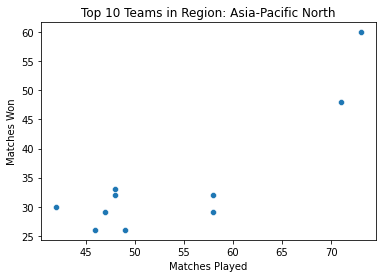

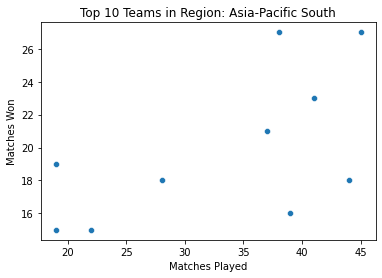

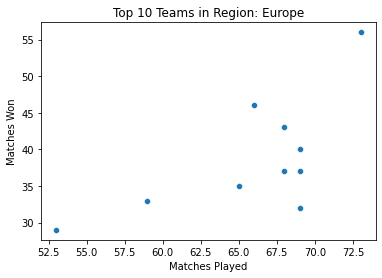

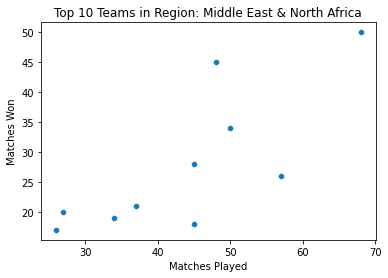

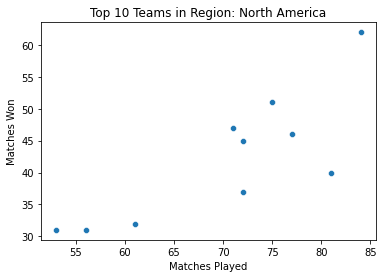

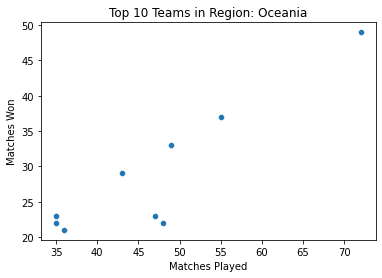

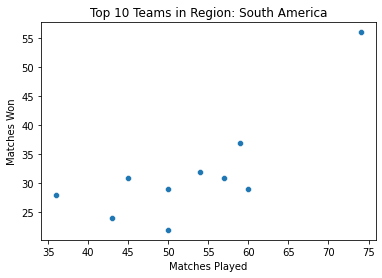

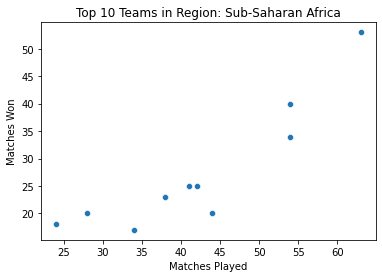

In [11]:


def plot_matches_vs_wins(df):
    # Group data by region and team name, and calculate number of matches played and won
    grouped = df.groupby(['team_region', 'team_name'])
    matches_played = grouped.size().reset_index(name='matches_played')
    matches_won = grouped['winner'].sum().reset_index(name='matches_won')

    # Merge the two dataframes to get both matches played and won for each team
    team_data = matches_played.merge(matches_won, on=['team_region', 'team_name'])

    # Sort by region and matches won
    team_data = team_data.sort_values(by=['team_region', 'matches_won'], ascending=[True, False])

    # Get the top 10 teams for each region
    top_10 = team_data.groupby('team_region').head(10)

    # Plot matches played vs matches won for each team in each region
    regions = top_10['team_region'].unique()
    for region in regions:
        region_data = top_10[top_10['team_region'] == region]
        sns.scatterplot(x='matches_played', y='matches_won', data=region_data)
        plt.title(f"Top 10 Teams in Region: {region}")
        plt.xlabel("Matches Played")
        plt.ylabel("Matches Won")
        plt.show()

plot_matches_vs_wins(df)


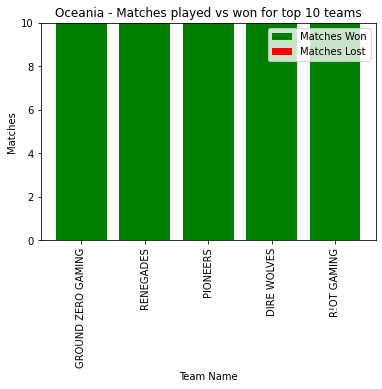

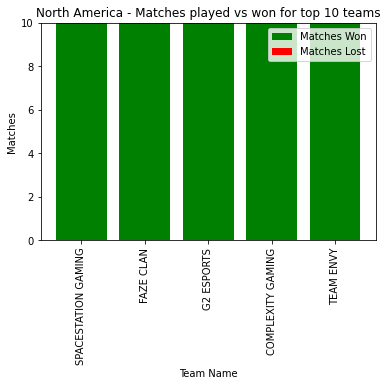

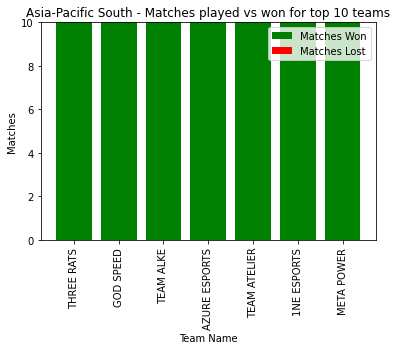

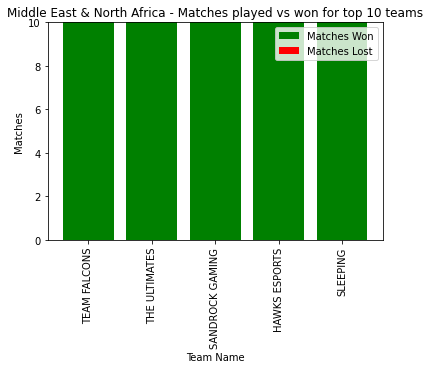

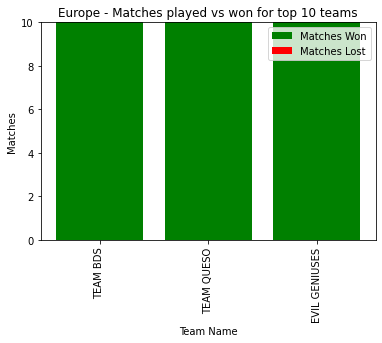

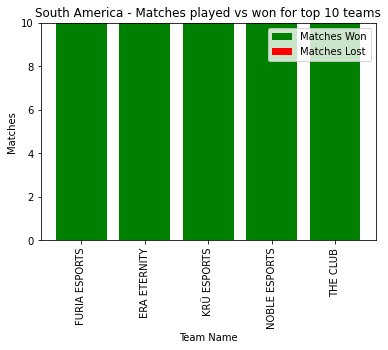

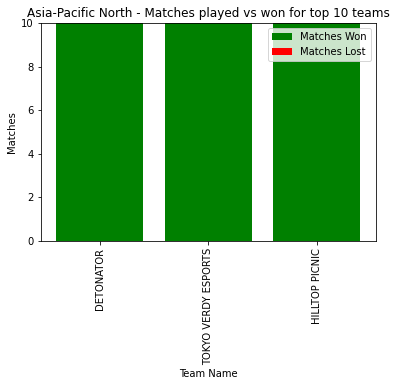

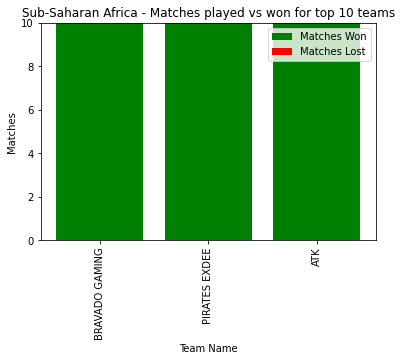

In [12]:
import matplotlib.pyplot as plt

regions = df['team_region'].unique()
for region in regions:
    region_df = df[df['team_region'] == region].sort_values(by='score', ascending=False)
    region_df = region_df.head(10)
    
    teams = region_df['team_name'].values
    matches_played = region_df['match_id'].nunique()
    matches_won = region_df[region_df['winner'] == True]['match_id'].nunique()
    
    fig, ax = plt.subplots()
    ax.bar(teams, matches_won, color='green')
    ax.bar(teams, matches_played - matches_won, bottom=matches_won, color='red')
    
    ax.set_title(f"{region} - Matches played vs won for top 10 teams")
    ax.set_xlabel("Team Name")
    ax.set_ylabel("Matches")
    ax.legend(["Matches Won", "Matches Lost"])
    plt.xticks(rotation=90)
    
plt.show()


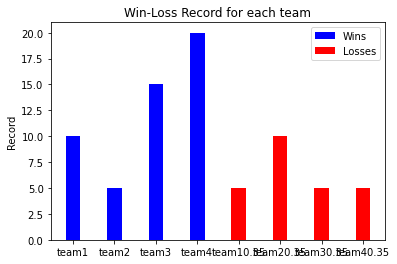

In [13]:
import matplotlib.pyplot as plt

# Define the teams and win-loss record
teams = ['team1', 'team2', 'team3', 'team4']
wins = [10, 5, 15, 20]
losses = [5, 10, 5, 5]

# Create the bar graph
fig, ax = plt.subplots()
bar_width = 0.35
bar1 = ax.bar(teams, wins, bar_width, color='blue')
bar2 = ax.bar([x + str(bar_width) for x in teams], losses, bar_width, color='red')
ax.set_ylabel('Record')
ax.set_title('Win-Loss Record for each team')
ax.legend((bar1[0], bar2[0]), ('Wins', 'Losses'))

plt.show()


In [14]:
sum=0
for i in df['Mode'].unique():
  gz=df[(df['team_name']=='GROUND ZERO GAMING') & (df['Mode']==i)]
  sum+=gz['winner'].astype(bool).sum()
print(sum*3)

111


In [15]:
df.iloc[23,:]

Unnamed: 0                                                                         23
match_id                                                     6159ad3d143c37878b2384b4
color                                                                          orange
team_id                                                      6020bc8ef1e4807cc700391a
team_slug                             https://octane.gg/teams/391a-ground-zero-gaming
team_name                                                          GROUND ZERO GAMING
team_region                                                                   Oceania
core_shots                                                                       38.0
core_goals                                                                        6.0
core_saves                                                                       22.0
core_assists                                                                      4.0
core_score                                            

**Boost Collection for each team**

In [16]:
import plotly.express as px

In [17]:
import plotly.express as px

fig = px.scatter(df, x='boost_amount_collected', y='boost_amount_used_while_supersonic',
                 color='team_name', hover_data=['team_name'],
                 labels={'boost_amount_collected':'Boost Collection',
                         'boost_amount_used_while_supersonic':'Boost Usage',
                         'team_name': 'Team Name'},
                 title='Boost Collection vs Boost Usage',
                 width=960, height=720)

fig.add_vline(x=df['boost_amount_collected'].mean(), line_width=1, line_dash="dash")
fig.add_hline(y=df['boost_amount_used_while_supersonic'].mean(), line_width=1, line_dash="dash")

fig.show()


In [18]:
worlds=df.loc[df['Mode'] == 'World Championship']
worlds.count()

Unnamed: 0                            120
match_id                              120
color                                 120
team_id                               120
team_slug                             120
team_name                             120
team_region                           120
core_shots                            120
core_goals                            120
core_saves                            120
core_assists                          120
core_score                            120
core_shooting_percentage              120
boost_bpm                             120
boost_bcpm                            120
boost_avg_amount                      120
boost_amount_collected                120
boost_amount_stolen                   120
boost_amount_collected_big            120
boost_amount_stolen_big               120
boost_amount_collected_small          120
boost_amount_stolen_small             120
boost_count_collected_big             120
boost_count_stolen_big            

In [19]:
fig = px.scatter(worlds, x='boost_amount_collected', y='boost_amount_used_while_supersonic',
                 color='team_name', hover_data=['team_name'],
                 labels={'boost_amount_collected':'Boost Collection',
                         'boost_amount_used_while_supersonic':'Boost Usage',
                         'team_name': 'Team Name'},
                 title='Boost Collection vs Boost Usage',
                 width=960, height=720)

fig.add_vline(x=df['boost_amount_collected'].mean(), line_width=1, line_dash="dash")
fig.add_hline(y=df['boost_amount_used_while_supersonic'].mean(), line_width=1, line_dash="dash")

fig.show()


In [20]:
fig = px.bar(worlds, x='team_name', y='boost_amount_collected', color='boost_amount_used_while_supersonic',
             labels={'boost_amount_collected':'Boost Collection',
                     'boost_amount_used_while_supersonic':'Boost Usage',
                     'team_name': 'Team Name'},
             title='Boost Collection vs Boost Usage',
             width=960, height=720)

fig.show()


In [21]:
df.tail()

,Unnamed: 0,match_id,color,team_id,team_slug,team_name,team_region,core_shots,core_goals,core_saves,...,positioning_time_offensive_third,positioning_time_defensive_half,positioning_time_offensive_half,positioning_time_behind_ball,positioning_time_in_front_ball,demo_inflicted,demo_taken,score,winner,Mode
10589,10589,62e02371da9d7ca1c7bb2f61,orange,6020bd98f1e4807cc700dc74,https://octane.gg/teams/dc74-team-bds,TEAM BDS,Europe,61.0,18.0,29.0,...,1516.41,4201.51,2630.25,5280.76,1550.99,19.0,13.0,4.0,True,World Championship
10590,10590,62e02371da9d7ca1c7bb2f62,blue,6020bc70f1e4807cc70023a5,https://octane.gg/teams/23a5-g2-esports,G2 ESPORTS,North America,46.0,14.0,38.0,...,1243.93,3871.85,2162.11,4417.79,1616.17,22.0,15.0,4.0,True,World Championship
10591,10591,62e02371da9d7ca1c7bb2f62,orange,605aca6853a71a78eacbc155,https://octane.gg/teams/c155-faze-clan,FAZE CLAN,North America,50.0,5.0,26.0,...,1341.10,3731.48,2281.36,4300.44,1712.41,15.0,22.0,2.0,False,World Championship
10592,10592,62e02371da9d7ca1c7bb2f63,blue,6020bd98f1e4807cc700dc74,https://octane.gg/teams/dc74-team-bds,TEAM BDS,Europe,36.0,10.0,19.0,...,936.44,3358.93,1685.25,3816.52,1227.65,11.0,21.0,4.0,True,World Championship
10593,10593,62e02371da9d7ca1c7bb2f63,orange,6020bc70f1e4807cc70023a5,https://octane.gg/teams/23a5-g2-esports,G2 ESPORTS,North America,33.0,5.0,21.0,...,1201.83,3036.30,2034.62,3517.24,1553.67,21.0,11.0,1.0,False,World Championship


In [22]:
import plotly.express as px

# filter data for Europe region
europe = df[df['team_region'] == 'Europe']

# pivot the data to have team_name as columns and positioning times as values
df_pivot = pd.pivot_table(europe, values=['positioning_time_neutral_third', 'positioning_time_offensive_third', 'positioning_time_offensive_half'],
index='team_name', aggfunc='mean')

# plot the bar graph
fig = px.bar(df_pivot, x=df_pivot.index, y=['positioning_time_neutral_third', 'positioning_time_offensive_third', 'positioning_time_offensive_half'],
             labels={'positioning_time_neutral_third':'Positioning Time Neutral Third',
                     'positioning_time_offensive_third':'Positioning Time Offensive Third',
                     'positioning_time_offensive_half': 'Positioning Time Offensive Half',
                     'team_name':'Team Name'},
             title='Positioning Time Comparison for Europe Region')

fig.show()


In [23]:
regions = ['Oceania', 'North America', 'Asia-Pacific South','Middle East & North Africa', 'Europe', 'South America','Asia-Pacific North','Sub-Saharan Africa']

# Create a new column for total positioning time for each region
df['total_positioning_time'] = df['positioning_time_neutral_third'] + df['positioning_time_offensive_third'] + df['positioning_time_offensive_half']

for region in regions:
    region_df = df[df['team_region'] == region]
    region_df=region_df.sort_values(by='total_positioning_time', ascending=False)
    fig = px.bar(region_df, x='team_name', y='total_positioning_time',
                 color='team_name', hover_data=['team_name'],
                 labels={'total_positioning_time':'Total Positioning Time',
                         'team_name': 'Team Name'},
                 title=f'Total Positioning Time for {region} Region')
    fig.show()


In [24]:
europe_teams = df[df['team_region'] == 'Europe']
fig = px.bar(europe_teams, x='team_name', y=['demo_inflicted', 'demo_taken'],
barmode='group',
labels={'demo_inflicted':'Demos Inflicted',
'demo_taken':'Demos Taken',
'team_name': 'Team Name'},
title='Demos Inflicted vs Demos Taken for Europe Teams')
fig.show()

In [25]:
region = 'Europe'
region_df = worlds[worlds['team_region'] == region]
region_df['total_demo'] = region_df['demo_inflicted'] + region_df['demo_taken']
region_df = region_df.sort_values(by='total_demo', ascending=False)

fig = px.bar(region_df, x='team_name', y=['demo_inflicted', 'demo_taken'], color='team_name',
             labels={'demo_inflicted':'Demos Inflicted',
                     'demo_taken':'Demos Taken',
                     'team_name': 'Team Name'},
             title=f'Demos Inflicted and Taken by Teams in {region} Region')

fig.show()


<ipython-input-25-d364f50b93c5>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
europe_teams = df[df['team_region'] == 'Europe']
europe_teams.sort_values(by='demo_taken', ascending=True, inplace=True)
fig = px.bar(europe_teams, x='team_name', y=['demo_inflicted', 'demo_taken'],
barmode='group',
labels={'demo_inflicted':'Demos Inflicted',
'demo_taken':'Demos Taken',
'team_name': 'Team Name'},
title='Demos Inflicted vs Demos Taken for Europe Teams')
fig.show()

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
regions = ['Oceania', 'North America', 'Asia-Pacific South',
'Middle East & North Africa', 'Europe', 'South America',
'Asia-Pacific North', 'Sub-Saharan Africa']

for region in regions:
  region_teams = df[df['team_region'] == region]
  fig = px.bar(region_teams, x='team_name', y=['demo_inflicted', 'demo_taken'],
  barmode='group',
  labels={'demo_inflicted':'Demos Inflicted',
  'demo_taken':'Demos Taken',
  'team_name': 'Team Name'},
  title=f'Demos Inflicted vs Demos Taken for {region} Teams')
  fig.show()

In [28]:
europe_teams = df[df['team_region'] == 'Europe']
fig = px.bar(europe_teams, x='team_name', y='winner',
             labels={'winner':'Wins',
                     'team_name': 'Team Name'},
             title='Wins for Europe Teams')
fig.show()


In [29]:
euro_teams = df[df['team_region'] == 'Europe']
# Count the number of wins for each team
team_wins = euro_teams.groupby('team_name')['winner'].sum().reset_index()

# Sort the teams by number of wins
team_wins = team_wins.sort_values(by='winner', ascending=False)

# Plot the results using plotly.express
fig = px.bar(team_wins, x='team_name', y='winner',
             labels={'team_name':'Team Name',
                         'winner': 'Wins'},
            hover_data=['team_name'], color='team_name',color_discrete_sequence=px.colors.sequential.BuGn)
fig.show()

In [52]:
regions_wins=df['team_region'].unique()
top_teams = pd.DataFrame()
for i in regions_wins:
  team = df[df['team_region'] == i]

  # Count the number of wins for each team
  team_wins = team.groupby('team_name')['winner'].sum().reset_index()
  # Sort the teams by number of wins
  team_wins = team_wins.sort_values(by='winner', ascending=False)
  top_10 = team_wins.head(10)
  top_teams = pd.concat([top_teams, team[team['team_name'].isin(top_10['team_name'])]])
  # Plot the results using plotly.express
  fig = px.bar(team_wins, x='team_name', y='winner',
              labels={'team_name':'Team Name',
                          'winner': 'Wins'},
              hover_data=['team_name'], color='team_name',color_discrete_sequence=px.colors.sequential.RdPu_r,
               title=f'Wins for {i} Teams')
  fig.update_layout(xaxis_tickangle=-45)
  fig.show()


In [38]:
import plotly.subplots as sp
import plotly.express as px
import plotly.graph_objs as go

In [55]:
top_teams.head()

,Unnamed: 0,match_id,color,team_id,team_slug,team_name,team_region,core_shots,core_goals,core_saves,...,positioning_time_defensive_half,positioning_time_offensive_half,positioning_time_behind_ball,positioning_time_in_front_ball,demo_inflicted,demo_taken,score,winner,Mode,total_positioning_time
0,0,6159ad3d143c37878b2384a9,blue,6020bc8ef1e4807cc700391a,https://octane.gg/teams/391a-ground-zero-gaming,GROUND ZERO GAMING,Oceania,34.0,9.0,8.0,...,1967.99,1237.05,2339.78,865.27,6.0,7.0,3.0,True,Regional 1,2943.73
2,2,6159ad3d143c37878b2384aa,blue,6020bc70f1e4807cc70023fb,https://octane.gg/teams/23fb-renegades,RENEGADES,Oceania,46.0,21.0,10.0,...,1972.65,1505.61,2616.06,862.25,11.0,7.0,3.0,True,Regional 1,3645.53
4,4,6159ad3d143c37878b2384ab,blue,6020bc8ef1e4807cc7003915,https://octane.gg/teams/3915-dire-wolves,DIRE WOLVES,Oceania,46.0,12.0,13.0,...,2900.66,1718.97,3444.64,1174.96,13.0,8.0,3.0,True,Regional 1,4304.81
7,7,6159ad3d143c37878b2384ac,orange,604e562301d675f81a96aea6,https://octane.gg/teams/aea6-big-goose,BIG GOOSE,Oceania,18.0,6.0,21.0,...,2309.80,1104.88,2400.63,1014.12,11.0,8.0,0.0,False,Regional 1,2764.25
8,8,6159ad3d143c37878b2384ad,blue,6020bec4f1e4807cc70163fc,https://octane.gg/teams/63fc-r-ot-gaming,R!OT GAMING,Oceania,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,True,Regional 1,NaN


In [56]:
regions = ['Oceania', 'North America', 'Asia-Pacific South',
'Middle East & North Africa', 'Europe', 'South America',
'Asia-Pacific North', 'Sub-Saharan Africa']

for region in regions:
  region_teams = top_teams[top_teams['team_region'] == region]
  fig = px.bar(region_teams, x='team_name', y=['demo_inflicted', 'demo_taken'],
  barmode='group',
  labels={'demo_inflicted':'Demos Inflicted',
  'demo_taken':'Demos Taken',
  'team_name': 'Team Name'},
  title=f'Demos Inflicted vs Demos Taken for {region} Teams')
  fig.show()

In [94]:
regions = ['Oceania', 'North America', 'Asia-Pacific South',
'Middle East & North Africa', 'Europe', 'South America',
'Asia-Pacific North', 'Sub-Saharan Africa']

for region in regions:
  region_teams = top_teams[top_teams['team_region'] == region]
  fig = px.scatter(region_teams, x='team_name', y=['demo_inflicted', 'demo_taken'],
  labels={'demo_inflicted':'Demos Inflicted',
  'demo_taken':'Demos Taken',
  'team_name': 'Team Name'},
  title=f'Demos Inflicted vs Demos Taken for {region} Teams')
  fig.show()